<a href="https://colab.research.google.com/github/kimdesok/Introduction-to-TensorFlow-for-Artificial-Intelligence-Machine-Learning-and-Deep-Learning-Coursera/blob/master/C2/C2_W1_Lab_1_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download and Inspect the Dataset

You will start by downloading the dataset. This is a `.zip` of 2,000 JPG pictures of cats and dogs. It is a subset of the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. You will only use 2,000 of the full dataset to decrease training time for educational purposes.

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-06-03 07:20:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   134MB/s    in 0.5s    

2022-06-03 07:20:31 (134 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



You will then extract it to the current directory.

In [2]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

The contents of the .zip are extracted to the base directory `./cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets (you can ignore `vectorize.py` in the output in the next cell). 

If you recall, the **training set** is the data that is used to tell the neural network model that 'this is what a cat looks like' and 'this is what a dog looks like'. The **validation set** is images of cats and dogs that the neural network will not see as part of the training. You can use this to test how well or how badly it does in evaluating if an image contains a cat or a dog. (See the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/validation/check-your-intuition) if you want a refresher on training, validation, and test sets.)

These subdirectories in turn each contain `cats` and `dogs` subdirectories.

In [3]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['vectorize.py', 'train', 'validation']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


You can assign each of these directories to a variable so you can use it later.

In [4]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


Now see what the filenames look like in the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.518.jpg', 'cat.666.jpg', 'cat.424.jpg', 'cat.190.jpg', 'cat.789.jpg', 'cat.333.jpg', 'cat.369.jpg', 'cat.274.jpg', 'cat.705.jpg', 'cat.273.jpg']
['dog.198.jpg', 'dog.577.jpg', 'dog.797.jpg', 'dog.840.jpg', 'dog.144.jpg', 'dog.725.jpg', 'dog.624.jpg', 'dog.276.jpg', 'dog.764.jpg', 'dog.602.jpg']


Let's find out the total number of cat and dog images in the `train` and `validation` directories:

In [6]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


For both cats and dogs, you have 1,000 training images and 500 validation images.

Now take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the `matplotlib` parameters:

In [15]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index - 8 : pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index - 8 : pic_index]
               ]

<Figure size 1152x1152 with 0 Axes>

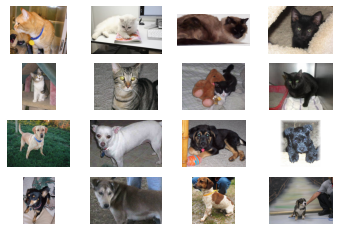

In [16]:
for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [19]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)       0

In [22]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary', target_size=(150,150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='binary', target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit(train_generator, steps_per_epoch = 100, epochs = 15, validation_data=validation_generator, validation_steps = 50, verbose=2)

Epoch 1/15
100/100 - 53s - loss: 0.7730 - accuracy: 0.5475 - val_loss: 0.6522 - val_accuracy: 0.6330 - 53s/epoch - 532ms/step
Epoch 2/15
100/100 - 52s - loss: 0.6386 - accuracy: 0.6405 - val_loss: 0.5945 - val_accuracy: 0.6820 - 52s/epoch - 516ms/step
Epoch 3/15
100/100 - 52s - loss: 0.5541 - accuracy: 0.7275 - val_loss: 0.6274 - val_accuracy: 0.6590 - 52s/epoch - 518ms/step
Epoch 4/15
100/100 - 53s - loss: 0.4620 - accuracy: 0.7775 - val_loss: 0.6660 - val_accuracy: 0.6760 - 53s/epoch - 529ms/step
Epoch 5/15
100/100 - 52s - loss: 0.3717 - accuracy: 0.8240 - val_loss: 0.8208 - val_accuracy: 0.6580 - 52s/epoch - 520ms/step
Epoch 6/15
100/100 - 56s - loss: 0.2819 - accuracy: 0.8805 - val_loss: 0.7430 - val_accuracy: 0.7020 - 56s/epoch - 558ms/step
Epoch 7/15
100/100 - 62s - loss: 0.1993 - accuracy: 0.9200 - val_loss: 0.8195 - val_accuracy: 0.7080 - 62s/epoch - 623ms/step
Epoch 8/15
100/100 - 55s - loss: 0.1474 - accuracy: 0.9400 - val_loss: 0.9463 - val_accuracy: 0.7200 - 55s/epoch - 546

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/' + fn
  img = image.load_img(path, target_size=(150,150))

  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  print(len(images))

  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving 274926633_1919012268285889_7807375053833647916_n.jpg to 274926633_1919012268285889_7807375053833647916_n.jpg
1
[0.24303567]
274926633_1919012268285889_7807375053833647916_n.jpg is a cat
